In [146]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt
from scipy.special import erf 
import os

In [147]:
def file_reader(fname_in,repeat):
    first = True
    for i_rep in range(repeat):
        fname = fname_in + "_i_%d.npz" % (i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            Ntot += Nrep
    if not first:    
        return succ_prob_avg/Ntot, p_list, Ntot
    else:
        return 0,0,0

## 7-qubit

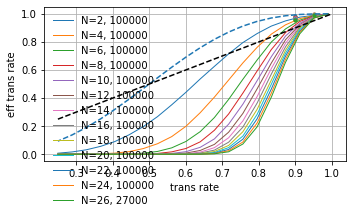

In [328]:
repeat = 100
# Nl_list = np.concatenate((np.arange(2,9),np.arange(10,41,5)))
Nl_list = np.arange(2,27,2)
p_r = 0.1
plt.figure(1,figsize=(5,3))

bdy = True
Nl = 2
first = True

for i_L, Nl in enumerate(Nl_list):

    f1 = "data_7q/" + "even_Nl_%d" % (Nl)
    succ_prob_even, p_list_even, Ntot_even = file_reader(f1,repeat) 
    succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)]
    plt.plot(1-p_list_even,succ_prob_even,".", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot_even))
        
    # f1 = "old_data/data_7q/" + "obc_Nl_%d" % (Nl)
    # succ_prob_even, p_list_even, Ntot_even = file_reader(f1,repeat) 
    # succ_prob_repeater = np.interp(p_r,p_list_even, succ_prob_even)
    # plt.plot(1-p_list_even,succ_prob_even,"-", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))

    # f2 = "old_data/data_7q/" + "obc_p_%.2f_Nl_%d" % (p_r,Nl)
    f2 = "data_7q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_odd, p_list, Ntot = file_reader(f2,repeat) 
    
    plt.plot((1-p_list),succ_prob_odd,"-", color="C%d" % (i_L), linewidth=1,label="N=%d, %d" % (Nl,Ntot))
    # plt.plot((1-p_list),succ_prob_odd**2,".", color="C%d" % (i_L), linewidth=1,label="N=%d, %d" % (Nl,Ntot))

f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
plt.plot(1-p_list,f(1-p_list)**1,"--")#, color="C%d" % (i_L))

x_list = np.linspace(0.25,1)
plt.plot(x_list,x_list,"k--")
# plt.yscale("log")
# plt.ylim(7e-1,9e-1)
# # plt.ylim(6e-1,1.01)
# plt.xlim(8e-1,9e-1)
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## Eff trans vs. distance

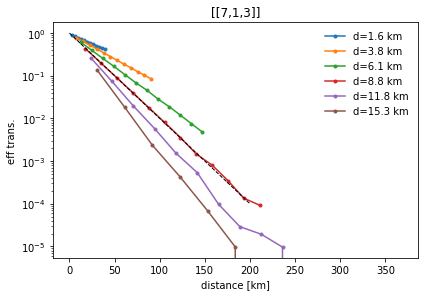

In [321]:
repeat = 100
p_r = 0.1
Nl_list = np.arange(2,25,2)
ind_p_list = np.arange(0,15,2)#[8,11,14]
succ_prob_avg = np.zeros((len(ind_p_list),len(Nl_list)))

plt.figure(1,figsize=(6,4))
bdy = True
for i_L, Nl in enumerate(Nl_list):
    f1 = "data_7q/" + "even_Nl_%d" % (Nl)
    # f1 = "old_data/data_7q/" + "obc_Nl_%d" % (Nl)
    succ_prob_even, p_list_even, Ntot_even = file_reader(f1,repeat) 
    succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)]
    # succ_prob_repeater = np.interp(p_r,p_list_even, succ_prob_even)
        
    # f2 = "old_data/data_7q/" + "obc_p_%.2f_Nl_%d" % (p_r,Nl)
    f2 = "data_7q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_odd, p_list, Ntot = file_reader(f2,repeat) 
    succ_prob_avg[:,i_L] = succ_prob_odd[ind_p_list]*succ_prob_repeater
    
for i_p, ind_p in enumerate(ind_p_list):
    unit_dist = -50*np.log10((1-p_list[ind_p])/(1-p_r))
    if unit_dist>0:
        plt.plot(Nl_list*unit_dist,succ_prob_avg[i_p,:],".-",label="d=%.1f km" % (unit_dist))

x_list = np.linspace(0.01,200,100)
# plt.plot(x_list,-np.log2(1-10**(-0.02*x_list)),"k--",linewidth=1)
plt.plot(x_list,10**(-0.2*x_list/10),"k--",linewidth=1)
# plt.plot(x_list,10**(-x_list/10),"k--",linewidth=1)
# plt.plot(x_list,-np.log2(1-10**(-0.01*x_list)),"k--",linewidth=1)
# plt.plot(x_list,10**(0.02*x_list),"k--",linewidth=1)
plt.xlabel("distance [km]")
# plt.ylabel(r"$p_{loss}$")
# plt.ylabel("cost fn.")
plt.ylabel("eff trans.")
plt.yscale("log")

# plt.ylim(1e-1,2e0)
# # plt.ylim(1e-1,100)
# plt.xlim(0.0,50)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.title("[[7,1,3]]")
# plt.grid()
# plt.savefig("figs_Hassan/eff_loss_rate_vs_distance_48q_pr_0.pdf")
plt.show()

## 48-qubit ldpc

In [275]:
def file_reader_ldpc(fname_in,Nq,repeat,even_odd):
    first = True
    for i_rep in range(repeat):
        fname = fname_in + "_i_%d.npz" % (i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            if even_odd == "odd":
                succ_prob_word, succ_prob, p_list, Nrep = npz_file['succ_prob_word_X'], npz_file['succ_prob_X'],  npz_file['p_list'], npz_file['Nrep']
            else:
                succ_prob_word, succ_prob, p_list, Nrep = npz_file['succ_prob_word_Z'], npz_file['succ_prob_Z'],  npz_file['p_list'], npz_file['Nrep']

            if first :
                first = False
                succ_prob_avg = np.zeros((len(p_list),Nq))
                succ_prob_word_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            succ_prob_word_avg += succ_prob_word*Nrep
            Ntot += Nrep
    if not first:    
        return succ_prob_avg/Ntot, succ_prob_word_avg/Ntot, p_list, Ntot
    else:
        return 0,0,0,0

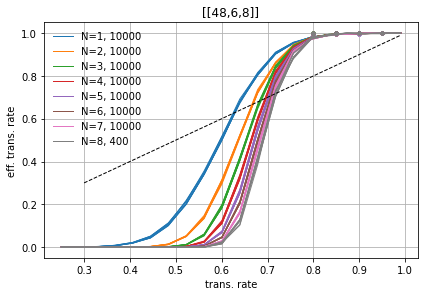

In [330]:
repeat = 100
# Nl_list = [2,10,15,20,30]#
Nl_list =np.arange(1,9,1)
p_r = 0.2


plt.figure(1,figsize=(6,4))

bdy = True

for i_L, Nl in enumerate(Nl_list):
    f1 = "data_48q/" + "even_Nl_%d" % (Nl)
    succ_prob_even,_, p_list_even, Ntot_even = file_reader_ldpc(f1,6,repeat,"even") 
    plt.plot(1-p_list_even,succ_prob_even,".", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        
    f2 = "data_48q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,6,repeat,"odd") 
 
    plt.plot(1-p_list,succ_prob_odd[:,0],"-", color="C%d" % (i_L), linewidth=1,label="N=%d, %d" % (Nl,Ntot))
    plt.plot(1-p_list,succ_prob_odd,"-", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
    # # plt.plot(1-p_list,succ_prob_word_avg,"--", color="C%d" % (i_L))#,label="N=%d, %d" % (Nl,Ntot))

# f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
# plt.plot(1-p_list,f(1-p_list)**1,"--")#, color="C%d" % (i_L))

# f2 = "data_48q/" + "odd_p_%.2f_Nl_%d" % (p_r,1)
# succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,6,repeat,"odd") 
# plt.plot(1-p_list,succ_prob_odd[:,0]**Nl,"x", color="C%d" % (i_L), linewidth=1,label="N=%d, %d" % (Nl,Ntot))
   
x_list = np.linspace(0.3,0.99,100)
plt.plot(x_list,x_list,"k--",linewidth=1)
# plt.plot(x_list,x_list**2,"k--",linewidth=1)
# plt.fill_between(x_list,x_list**2,1+0*x_list,color="gray",alpha=0.3)
# x_list = np.linspace(0.,230,100)
# plt.plot(x_list,10**(-0.02*x_list),"k--",linewidth=1)
# plt.xlabel("distance [km]")
plt.xlabel("trans. rate")
# plt.ylabel(r"$p_{loss}$")
plt.ylabel("eff. trans. rate")
# plt.yscale("log")

# plt.ylim(1e-4,2e0)
# # # plt.ylim(6e-1,1.01)
# plt.xlim(0.0,250)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.title("[[48,6,8]]")
plt.grid()
# plt.savefig("figs_Hassan/eff_loss_rate_48q.pdf")
plt.show()

distance

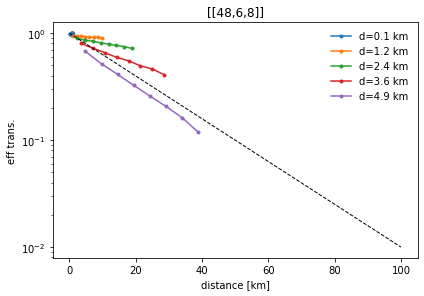

In [323]:
repeat = 100
p_r = 0.2
Nl_list = np.arange(1,9,1)
ind_p_list = np.arange(0,10,1)#[8,11,14]
succ_prob_avg = np.zeros((len(ind_p_list),len(Nl_list)))

plt.figure(1,figsize=(6,4))
bdy = True
for i_L, Nl in enumerate(Nl_list):
    f1 = "data_48q/" + "even_Nl_%d" % (Nl)
    succ_prob_even,_, p_list_even, Ntot_even = file_reader_ldpc(f1,6,repeat,"even") 
    succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)[0,:],:]
    plt.plot(1-p_list_even,succ_prob_even,".", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        
    f2 = "data_48q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,6,repeat,"odd") 
    # succ_prob_avg[:,i_L] = (np.mean(succ_prob_odd,axis=1))[ind_p_list]*np.mean(succ_prob_repeater,axis=1)
    succ_prob_avg[:,i_L] = np.mean( succ_prob_odd[ind_p_list,:]*succ_prob_repeater ,axis=1)

    
for i_p, ind_p in enumerate(ind_p_list):
    unit_dist = -50*np.log10((1-p_list[ind_p])/(1-p_r))
    if unit_dist>0:
        plt.plot(Nl_list*unit_dist,succ_prob_avg[i_p,:],".-",label="d=%.1f km" % (unit_dist))

x_list = np.linspace(0.01,100,100)
# plt.plot(x_list,-np.log2(1-10**(-0.02*x_list)),"k--",linewidth=1)
plt.plot(x_list,10**(-0.2*x_list/10),"k--",linewidth=1)
plt.xlabel("distance [km]")
# plt.ylabel(r"$p_{loss}$")
# plt.ylabel("cost fn.")
plt.ylabel("eff trans.")
plt.yscale("log")

# plt.ylim(1e-1,2e0)
# # plt.ylim(1e-1,100)
# plt.xlim(0.0,50)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.title("[[48,6,8]]")
# plt.grid()
# plt.savefig("figs_Hassan/eff_loss_rate_vs_distance_48q_pr_0.pdf")
plt.show()